## Anomaly Detection in Curriculum logs

Jess Gardin

Saroj Duwal

Lindy Castellaw

### Acquire/Wrangle

In [1]:
import env
import warnings
warnings.filterwarnings("ignore")
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import wrangle
import fun_4
import wrangle_z

new_logs_data()
get_logs_data()
prepare(df)


In [2]:
df = wrangle.get_logs()

In [3]:
df,ds_df, web_df, staff_df,null_df = wrangle.prepare_log(df)


In [4]:
df.head()

,date,time,endpoint,user,source_ip,cohort_name,start_date,end_date,program_id,page_1,page_2,page_3,page_4
date,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,,,None,None
2018-01-26,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii,None,None,None
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii,object-oriented-programming,None,None
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,slides,object_oriented_programming,None,None
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0,javascript-i,conditionals,None,None


## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

#### - for Data Science Program

In [5]:
# value counts with pages converted to dataframe
pd.DataFrame(ds_df[['page_1','page_2','page_3']].value_counts())

0
page_1         page_2                   page_3                               
appendix       cli                      5-creating-files-and-directories  204
                                        2-listing-files                   168
                                        6-moving-files                    167
                                        4-navigating-the-filesystem       165
fundamentals   cli                      listing-files                     165
appendix       cli                      1-intro                           164
fundamentals   cli                      overview                          163
appendix       cli                      3-file-paths                      158
fundamentals   cli                      intro                             157
appendix       cli                      0-overview                        157
                                        7-more-topics                     140
fundamentals   cli                      creating-files-and-directories    131
                                        file-paths                        122
                                        navigating-the-filesystem         120
                                        moving-files                      110
                                        more-topics                        96
appendix       professional-development cover-letter-copy                  72
                                        t-block-lesson-ds                  58
               coding-challenges        amateur                            35
               professional-development linkedin-tips                      33
                                        mock-behavioral-question           32
                                        vertical-resume                    32
                                        professionalism-101                31
                                        offer-letters                      26
                                        interview-questions-tech           25
                                        virtual-meeting-tips-and-tricks    22
                                        interview-questions-behavioral     22
               coding-challenges        professional                       20
               professional-development tech-talk                          16
                                        email-setup                        15
               coding-challenges        intermediate                       14
               open_data                www.who.int                         9
               professional-development interview-guidance                  9
               open_data                www.followthemoney.org              8
               professional-development mock-behavioral-questions           7
               open_data                www.basketball-reference.com        7
                                        www.opensecrets.org                 4
                                        www.census.gov                      4
                                        www.databasefootball.com            3
                                        www.stat.ucla.edu                   2
spring         extra-features           error-pages                         2
appendix       git                      intellij-intro                      2
               data_science_community   www.kdnuggets.com                   2
5-stats        1-overview               null                                2
,%20https:                              github.com                          1
5-stats        4.2-compare-means        null                                1
regression     project                  null                                1
javascript-i   bom-and-dom              dom                                 1
grades         getUserDetails           916                                 1
2-storytelling 1-overview               www.qlik.com                        1
fundamentals   cli  

<AxesSubplot:ylabel='page_1,page_2,page_3'>

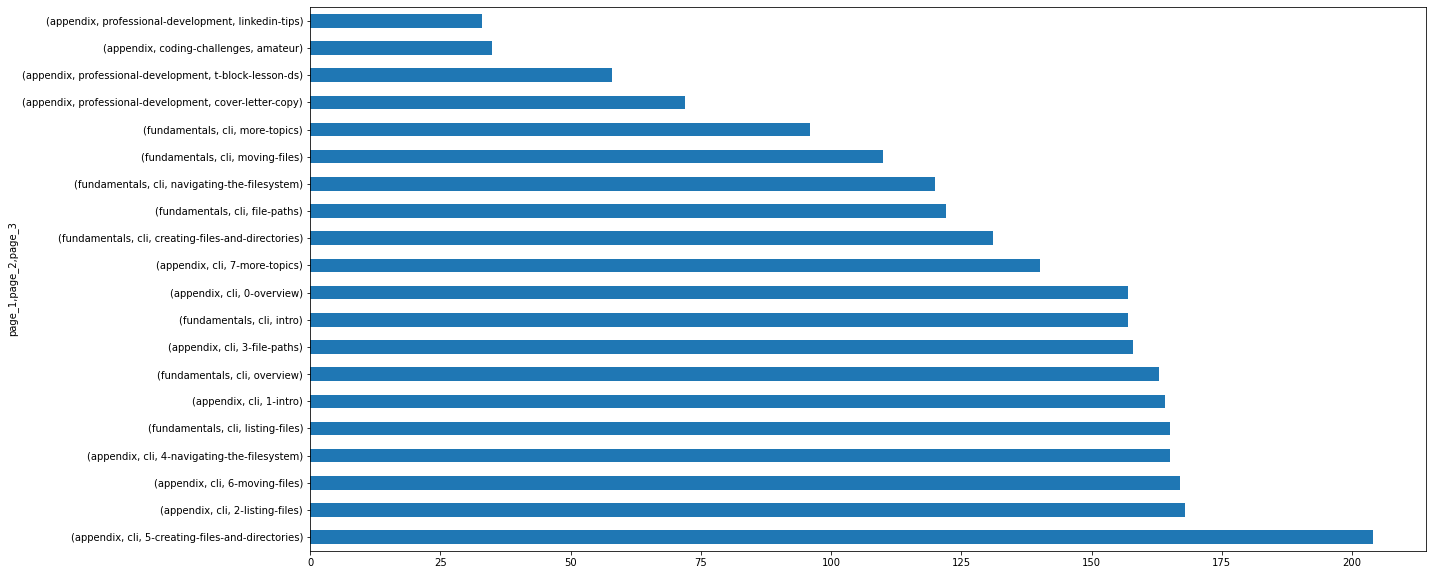

In [6]:
# visualize  data science cohort pages/lessons visited

plt.figure(figsize=(20,10))
ds_df[['page_1','page_2','page_3']].value_counts().head(20).plot(kind='barh')

#### - for Web Developer Program

In [7]:
# creating a dataframe with pages and count
pd.DataFrame(web_df[['page_1','page_2','page_3']].value_counts())

0
page_1       page_2          page_3                                               
javascript-i introduction    working-with-data-types-operators-and-variables  7041
html-css     css-i           flexbox                                          6187
             css-ii          bootstrap-grid-system                            6140
                             bootstrap-introduction                           5682
spring       fundamentals    views                                            5158
...                                                                            ...
cohorts      24              capstone-all                                        1
mysql                        functions                                           1
                             extra-exercises                                     1
appendix     further-reading css-grid-additional-features                        1
PreWork      PreWork         cli                                                 1

[331 rows x 1 columns]

<AxesSubplot:ylabel='page_1,page_2,page_3'>

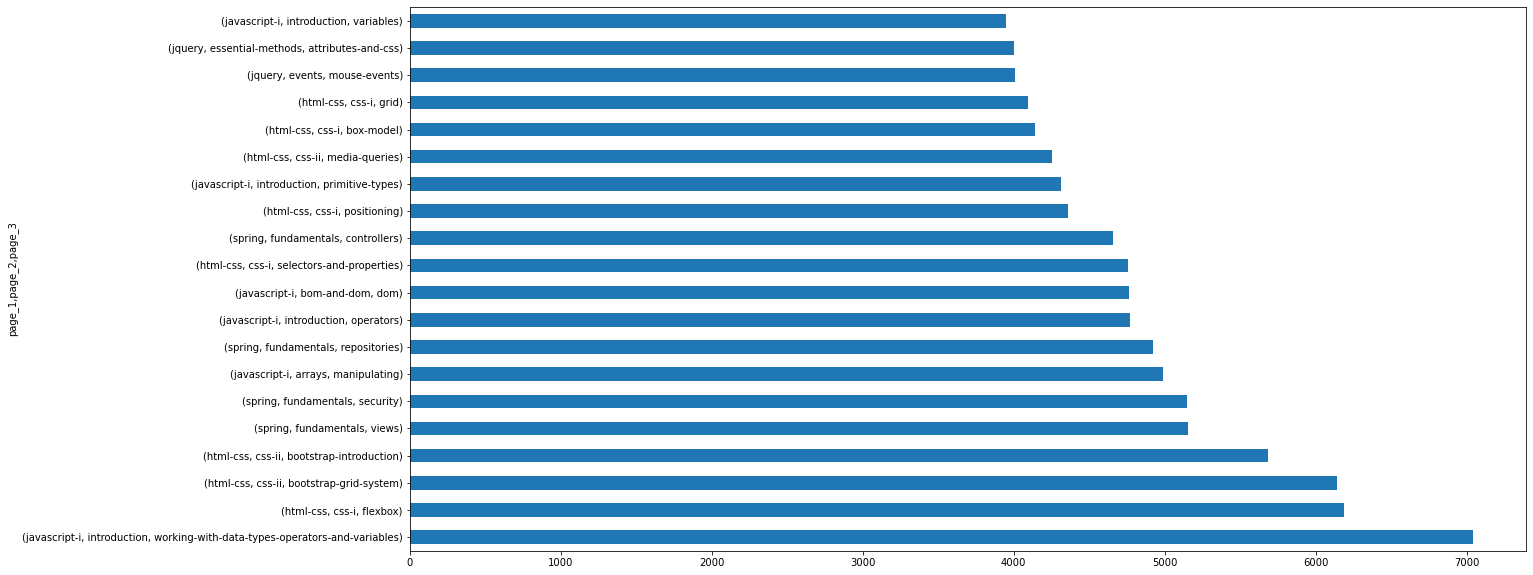

In [8]:
# visualize for web devlopers by page
plt.figure(figsize=(20,10))
web_df[['page_1','page_2','page_3']].value_counts().head(20).plot(kind='barh')

### Takeaways from question 1
#### - Web Development Program most visited Lesson : "**working-with-data-types-operators-and-variables from Javscript-I Introduction** " 
#### - Data Science Program most visited Lesson : " ** creating-files-and-directories from Comand Line Interface(cli)  in Appendix"  





# 7. Which lessons are least accessed?


#### - for Data Science Program




<AxesSubplot:ylabel='page_1,page_2,page_3'>

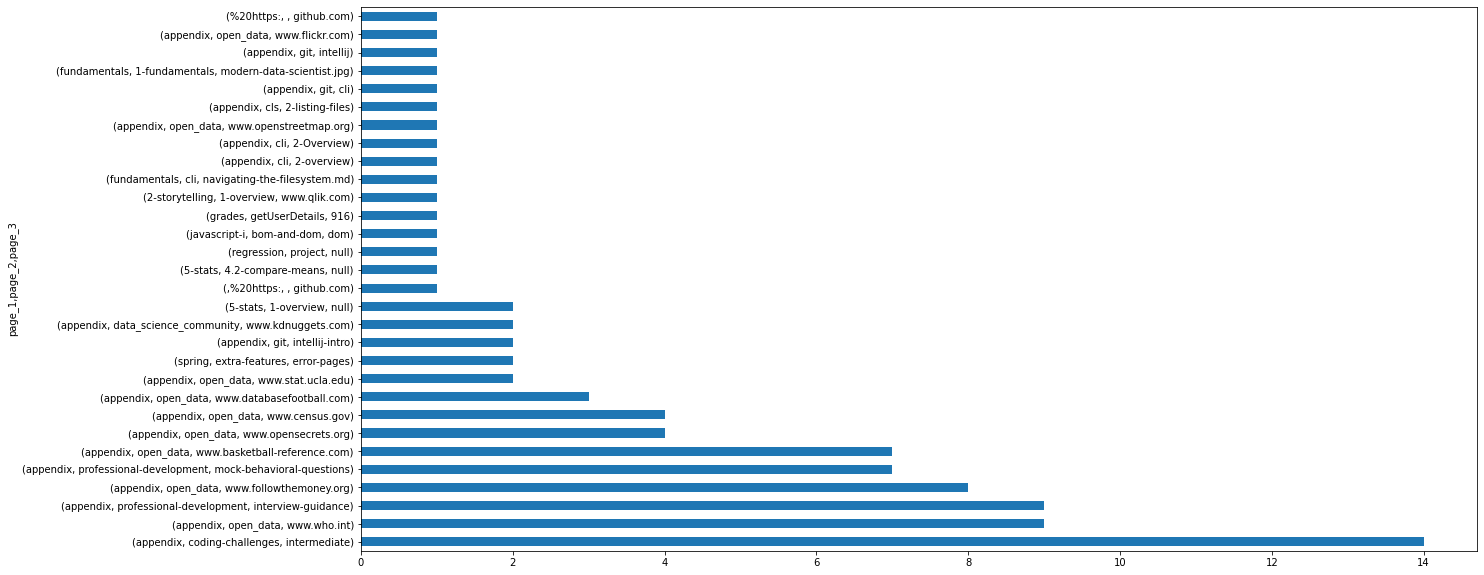

In [9]:
# plot pages for data science program with the bottom 30 observations
plt.figure(figsize=(20,10))
ds_df[['page_1','page_2','page_3']].value_counts().tail(30).plot(kind='barh')

In [10]:
# creating a dtaframe with bottom 30 observations of the pages visited
pd.DataFrame(ds_df[['page_1','page_2','page_3']].value_counts().tail(30))

0
page_1         page_2                   page_3                          
appendix       coding-challenges        intermediate                  14
               open_data                www.who.int                    9
               professional-development interview-guidance             9
               open_data                www.followthemoney.org         8
               professional-development mock-behavioral-questions      7
               open_data                www.basketball-reference.com   7
                                        www.opensecrets.org            4
                                        www.census.gov                 4
                                        www.databasefootball.com       3
                                        www.stat.ucla.edu              2
spring         extra-features           error-pages                    2
appendix       git                      intellij-intro                 2
               data_science_community   www.kdnuggets.com              2
5-stats        1-overview               null                           2
,%20https:                              github.com                     1
5-stats        4.2-compare-means        null                           1
regression     project                  null                           1
javascript-i   bom-and-dom              dom                            1
grades         getUserDetails           916                            1
2-storytelling 1-overview               www.qlik.com                   1
fundamentals   cli                      navigating-the-filesystem.md   1
appendix       cli                      2-overview                     1
                                        2-Overview                     1
               open_data                www.openstreetmap.org          1
               cls                      2-listing-files                1
               git                      cli                            1
fundamentals   1-fundamentals           modern-data-scientist.jpg      1
appendix       git                      intellij                       1
               open_data                www.flickr.com                 1
%20https:                               github.com                     1

#### - for Web Developer Program

<AxesSubplot:ylabel='page_1,page_2,page_3'>

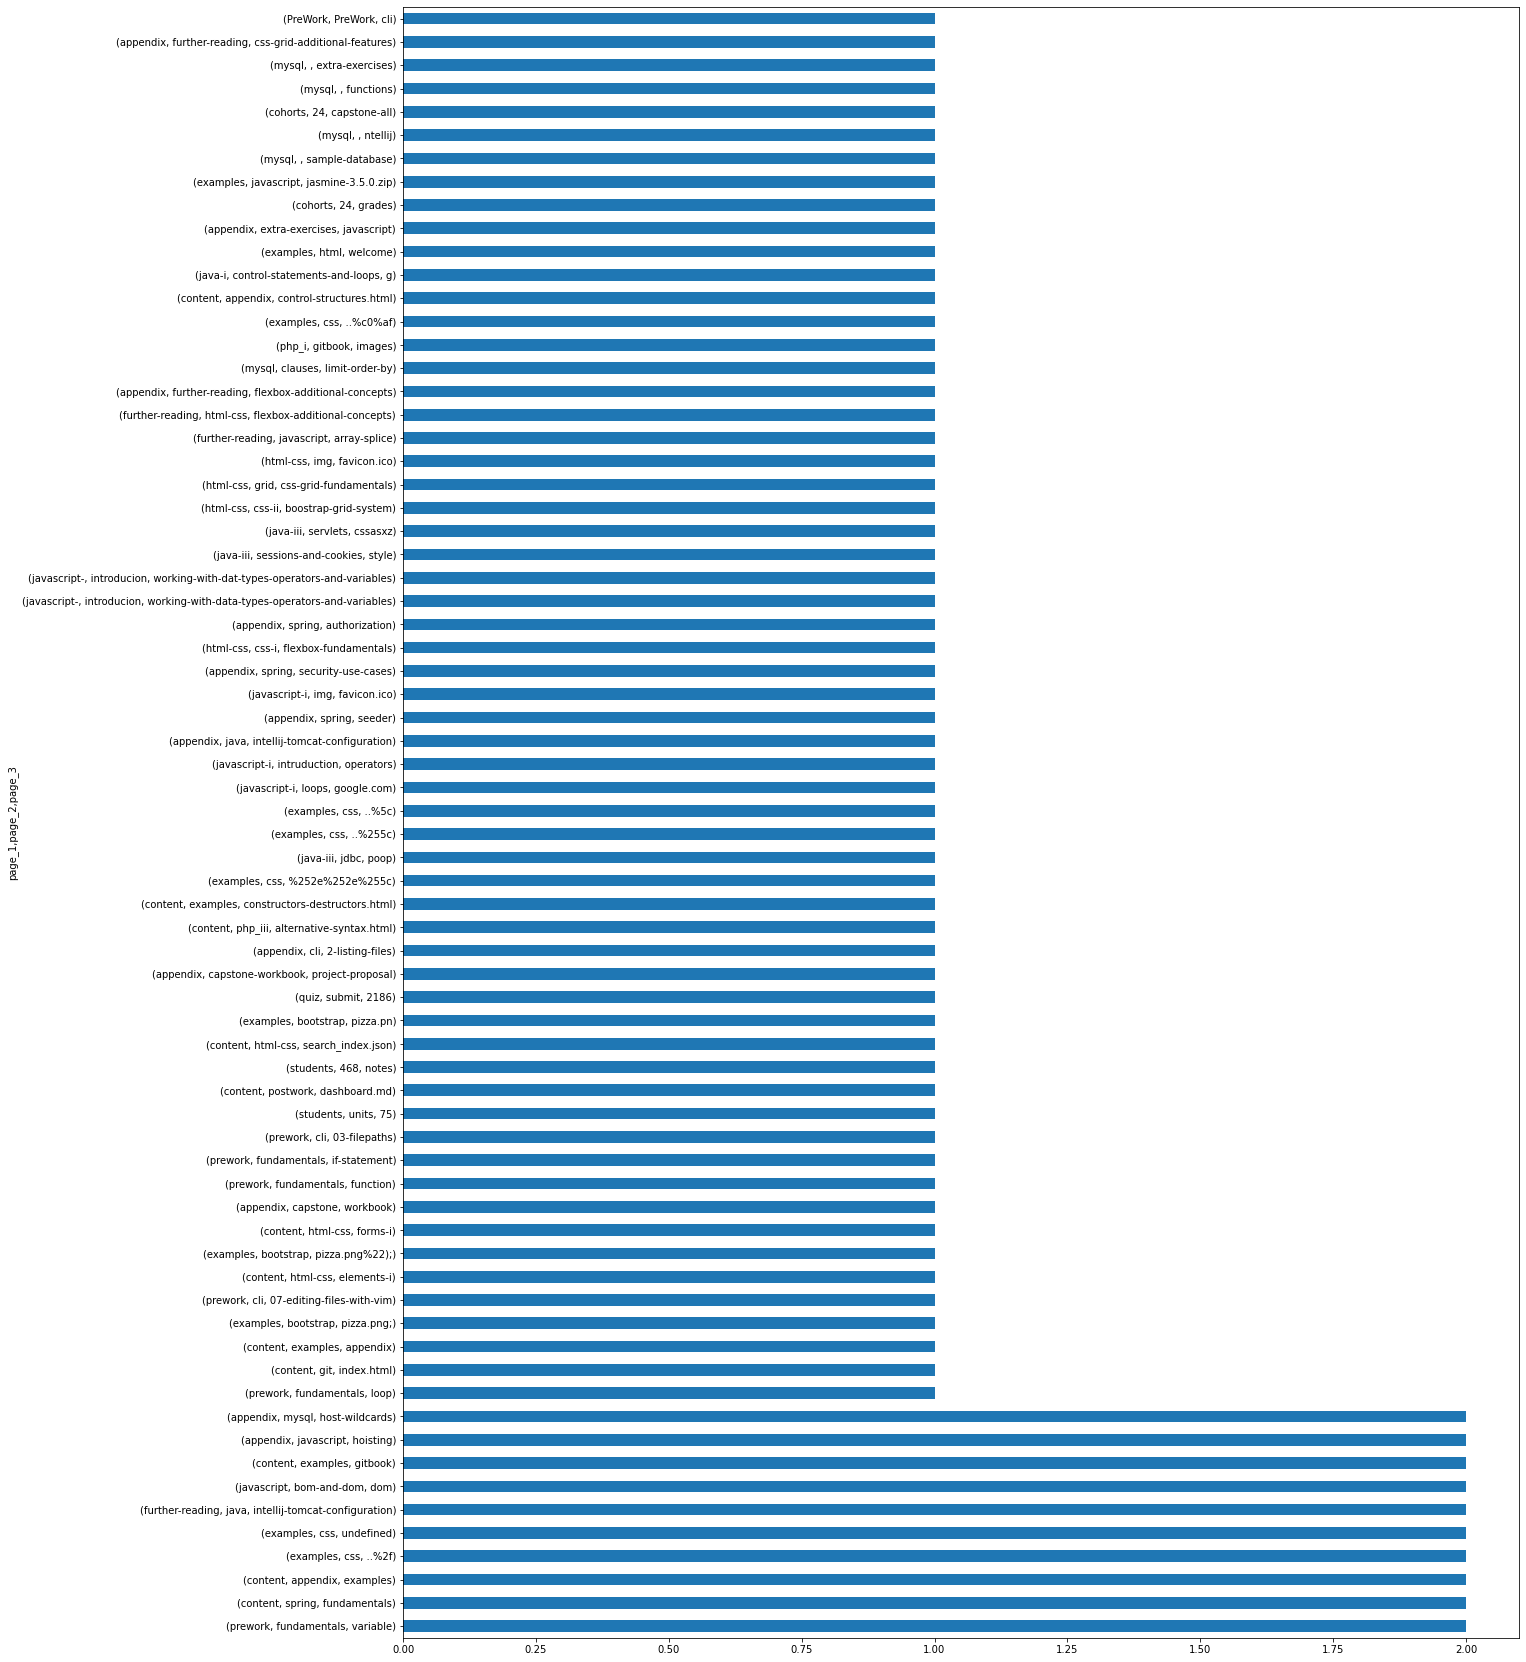

In [11]:
# plot the bar chart for the bottom observations
plt.figure(figsize=(20,30))
web_df[['page_1','page_2','page_3']].value_counts().tail(70).plot(kind='barh')

In [12]:
# creating a datframe  with the bottom observations
pd.DataFrame(web_df[['page_1','page_2','page_3']].value_counts().tail(60))

0
page_1          page_2                       page_3                                            
prework         fundamentals                 loop                                             1
content         git                          index.html                                       1
                examples                     appendix                                         1
examples        bootstrap                    pizza.png;                                       1
prework         cli                          07-editing-files-with-vim                        1
content         html-css                     elements-i                                       1
examples        bootstrap                    pizza.png%22);                                   1
content         html-css                     forms-i                                          1
appendix        capstone                     workbook                                         1
prework         fundamentals                 function                                         1
                                             if-statement                                     1
                cli                          03-filepaths                                     1
students        units                        75                                               1
content         postwork                     dashboard.md                                     1
students        468                          notes                                            1
content         html-css                     search_index.json                                1
examples        bootstrap                    pizza.pn                                         1
quiz            submit                       2186                                             1
appendix        capstone-workbook            project-proposal                                 1
                cli                          2-listing-files                                  1
content         php_iii                      alternative-syntax.html                          1
                examples                     constructors-destructors.html                    1
examples        css                          %252e%252e%255c                                  1
java-iii        jdbc                         poop                                             1
examples        css                          ..%255c                                          1
                                             ..%5c                                            1
javascript-i    loops                        google.com                                       1
                intruduction                 operators                                        1
appendix        java                         intellij-tomcat-configuration                    1
                spring                       seeder                                           1
javascript-i    img                          favicon.ico                                      1
appendix        spring                       security-use-cases                               1
html-css        css-i                        flexbox-fundamentals                             1
appendix        spring                       authorization                                    1
javascript-     introducion                  working-with-data-types-operators-and-variables  1
                                             working-with-dat-types-operators-and-variables   1
java-iii        sessions-and-cookies         style                                            1
                servlets                     cssasxz                                          1
html-css        css-ii                       boostrap-grid-system                             1
                grid                         css-grid-fundamentals                            1
                img                          favicon.ico      

### Takeaways from Question 7
- least accessed lessons on Data Science program: fundamentals, Modern-data-scientist, appendix professional-development, mock-behavioral-questions.
- least accessed lesson on Web Developer program: prework-fundamentals-loop, prework-fundamentals-function.

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

#### - for unique Data Science Program Cohort

In [13]:
# data science cohort unique names
ds_df.cohort_name.unique().tolist()

['Bayes', 'Curie', 'Darden', 'Easley', 'Florence']

Cohort : Bayes


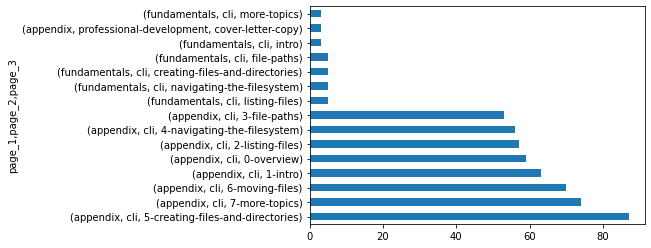

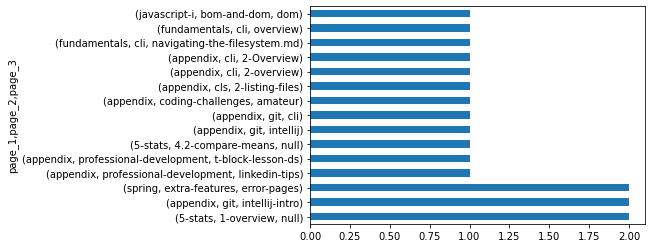

------------------------------------------------------------------
Cohort : Curie


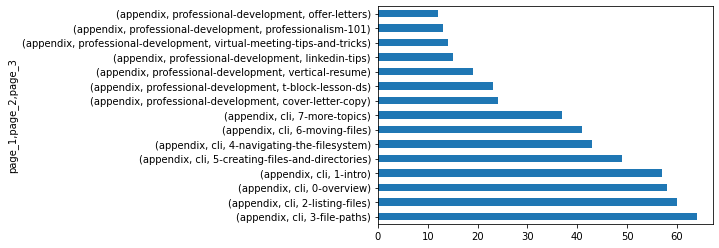

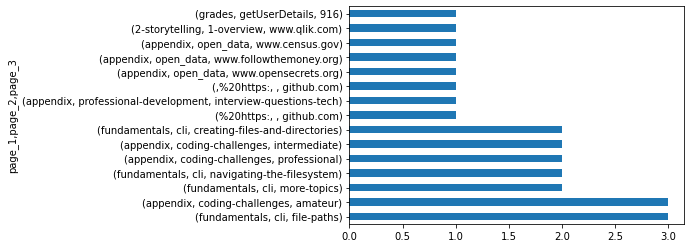

------------------------------------------------------------------
Cohort : Darden


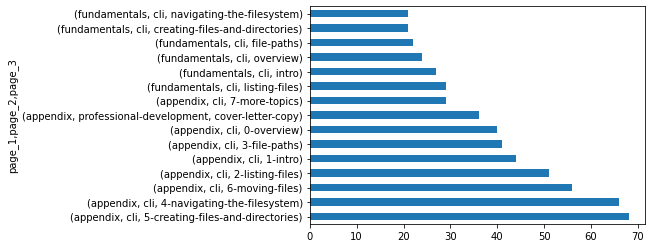

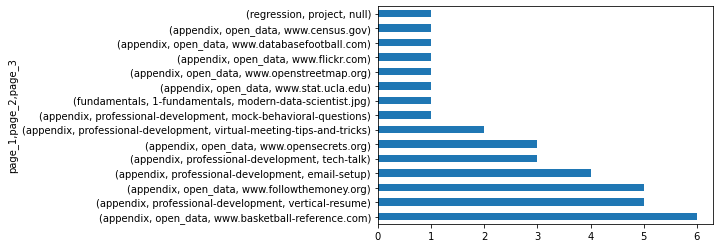

------------------------------------------------------------------
Cohort : Easley


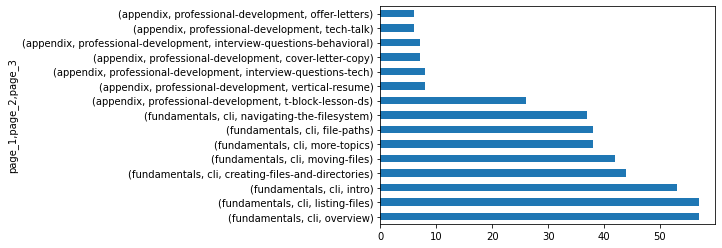

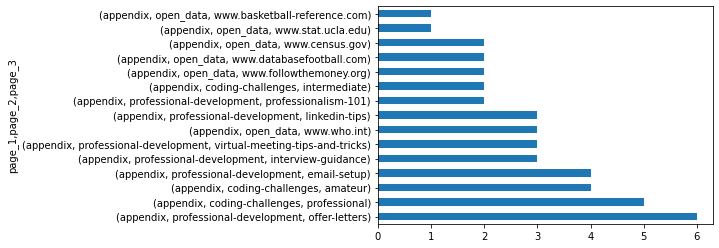

------------------------------------------------------------------
Cohort : Florence


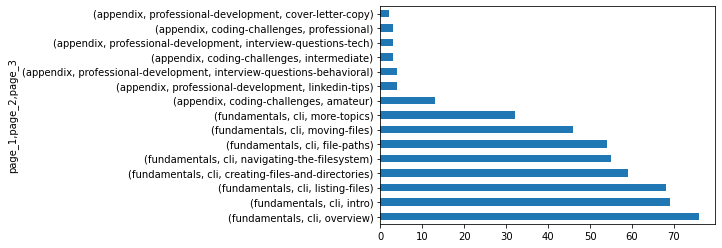

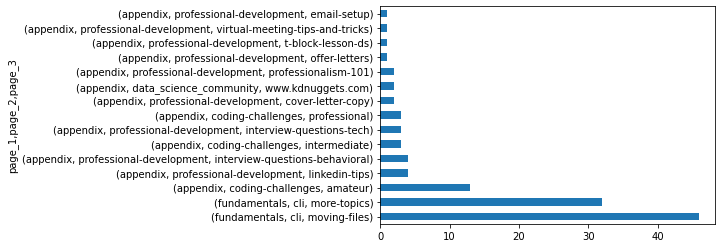

------------------------------------------------------------------


In [14]:
# create a list for the unique data science cohort name
val= list(ds_df.cohort_name.unique())

# loop through each unique cohort name and barchart plot the top and bottom 15 observations
for x in val:
    print(f'Cohort : {x}')
    ds_sub_df= ds_df[ds_df.cohort_name== x]
    ds_sub_df[['page_1','page_2','page_3']].value_counts().head(15).plot(kind='barh')
    plt.show()
    ds_sub_df[['page_1','page_2','page_3']].value_counts().tail(15).plot(kind='barh')
    plt.ylabel=('page visited')
    plt.xlabel =( 'times visited') 
    plt.show()
    print('------------------------------------------------------------------')

#### - for unique Web Developer Program Cohort

In [15]:
# web development unique cohort list
web_df.cohort_name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Zion',
       'Andromeda', 'Betelgeuse', 'Ceres', 'Deimos', 'Europa', 'Fortuna',
       'Apex', 'Ganymede', 'Everglades', 'Hyperion', 'Bash', 'Jupiter',
       'Kalypso', 'Luna', 'Marco', 'Neptune', 'Oberon'], dtype=object)

### Takeaways from Question no 2.
Professional Development varied strongly with cohort:
- High Frequency: Curie
- Medium Frequency: Easley
- Low Frequency: Florence, Darden, Bayers


# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [16]:
# for data science students checking the web dev

# unique pages visited 
page= list(ds_df.endpoint.unique())

# list of unique pages in web dev
web_keyword = list(web_df.endpoint.unique())

# create a loop to cross check a page visited by ds students that matches with unique pages from web dev cohort

count= 0
lst=[]
for x in web_keyword:
    if x in page:
        print(x)
        
        count+= 1
        lst.append(x)
        
print(count)


/
java-ii
java-ii/object-oriented-programming
javascript-i/conditionals
mkdocs/search_index.json
javascript-i
spring
appendix
index.html
java-i
html-css/introduction
javascript-i/bom-and-dom/dom
mysql
html-css
git/cli
appendix/documentation
jquery
javascript-ii
html-css/elements
html-css/forms
java-iii
spring/extra-features/error-pages
java-i/console-io
git
spring/extra-features/error-pages/asdfasdf
appendix/postwork
appendix/git/intellij-intro
appendix/git/intellij
appendix/git/cli
appendix/git
functions
group-by
.gitignore
toc
search/search_index.json
login
examples
Pipeline_Demo
database-design
AnomalyDetectionCartoon.jpeg
search
3-sql/1-mysql-overview
4-python/1-overview
4-python/2-introduction-to-python
4-python/3-data-types-and-variables
1-fundamentals/2.2-excel-functions
1-fundamentals/2.3-visualization-with-excel
1-fundamentals/project
2-storytelling/3-tableau
6-regression/1-overview
10-anomaly-detection/1-overview
10-anomaly-detection/AnomalyDetectionCartoon.jpeg
11-nlp/1-over

In [17]:
# web dev students visiting data science topics

# list of unique pages visited by web dev cohort
page = list(web_df.endpoint.unique())

# unique pages visited by data science cohort
ds_keyword = list(ds_df.endpoint.unique())

count= 0
cross_curr=[]
# loop
for x in ds_keyword:
    if x in page:
        print(x)
        
        count+= 1
        cross_curr.append(x)
        
print(count)


/
3-sql/1-mysql-overview
2-storytelling/bad-charts
2-storytelling/misleading1_baseball.jpg
2-storytelling/misleading1_fox.jpg
2-storytelling/misleading3_deaths.jpg
appendix/cli-git-overview
1-fundamentals/1.1-intro-to-data-science
1-fundamentals/modern-data-scientist.jpg
1-fundamentals/AI-ML-DL-timeline.jpg
1-fundamentals/1.2-data-science-pipeline
1-fundamentals/DataToAction_v2.jpg
search/search_index.json
1-fundamentals/1.3-pipeline-demo
6-regression/1-overview
10-anomaly-detection/1-overview
10-anomaly-detection/AnomalyDetectionCartoon.jpeg
11-nlp/1-overview
6-regression/2-regression-excel
6-regression/3.1-acquire-and-prep
6-regression/3.3-explore
7-classification/6.4-knn
5-stats/1-overview
1-fundamentals/2.2-excel-functions
1-fundamentals/project
1-fundamentals/2.4-more-excel-features
1-fundamentals/2.3-visualization-with-excel
2-storytelling/1-overview
2-storytelling/3-tableau
3-sql/3-databases
3-sql/7-functions
3-sql/8-group-by
2-storytelling/2.1-understand
2-storytelling/2.2-crea

## Takeaways from Question no. 5
- Access to both curriculum s were not shut off
- It is evident that there is cross referencing curriculum between the Data Science and web Developer Programs

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


Top five topics accessed for web dev after graduation:

1. '/' is homepage for web dev curriculum
2. 'javascript-i' front end language 
3. 'spring' back end framework for java
4. 'html-css' front end languages 
5. 'search_index.json' search in json

<AxesSubplot:ylabel='endpoint'>

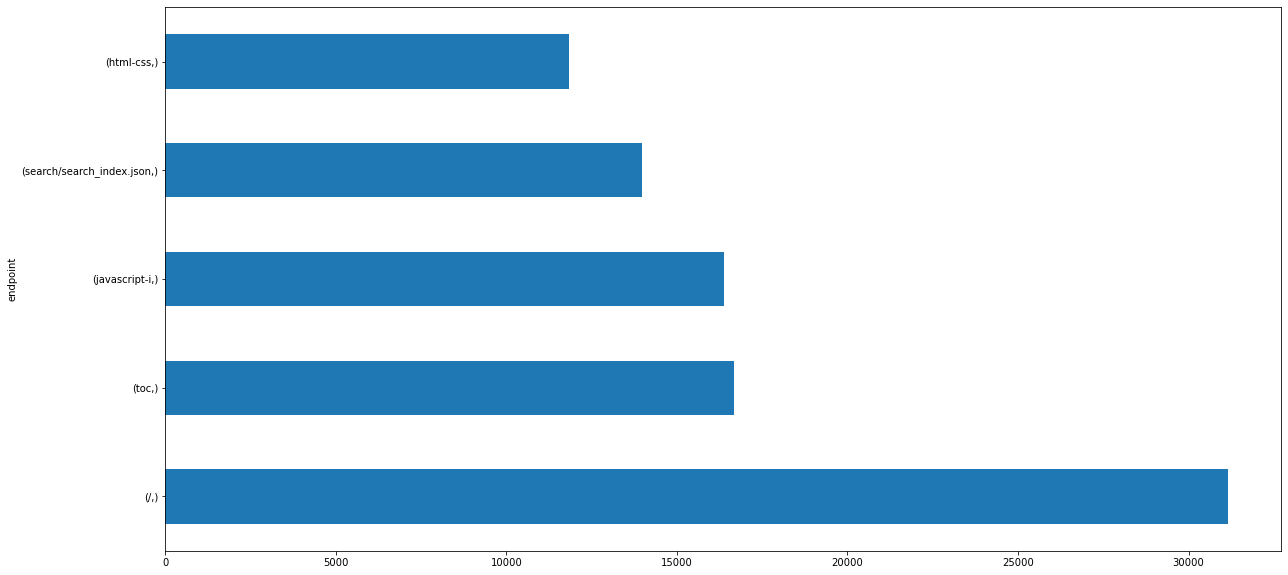

In [18]:
plt.figure(figsize=(20,10))
web_df[['endpoint']].value_counts().head().plot(kind='barh')

Top five topics accessed for Data Science after graduation:
1. '/' homepage for curriculum
2. 'search_index.json' search in json
3. 'mysql-overview' mysql intro lesson
4. 'classification/overview' classification intro lesson
5. 'scale_features_or_not.svg' scaling lesson

<AxesSubplot:ylabel='endpoint'>

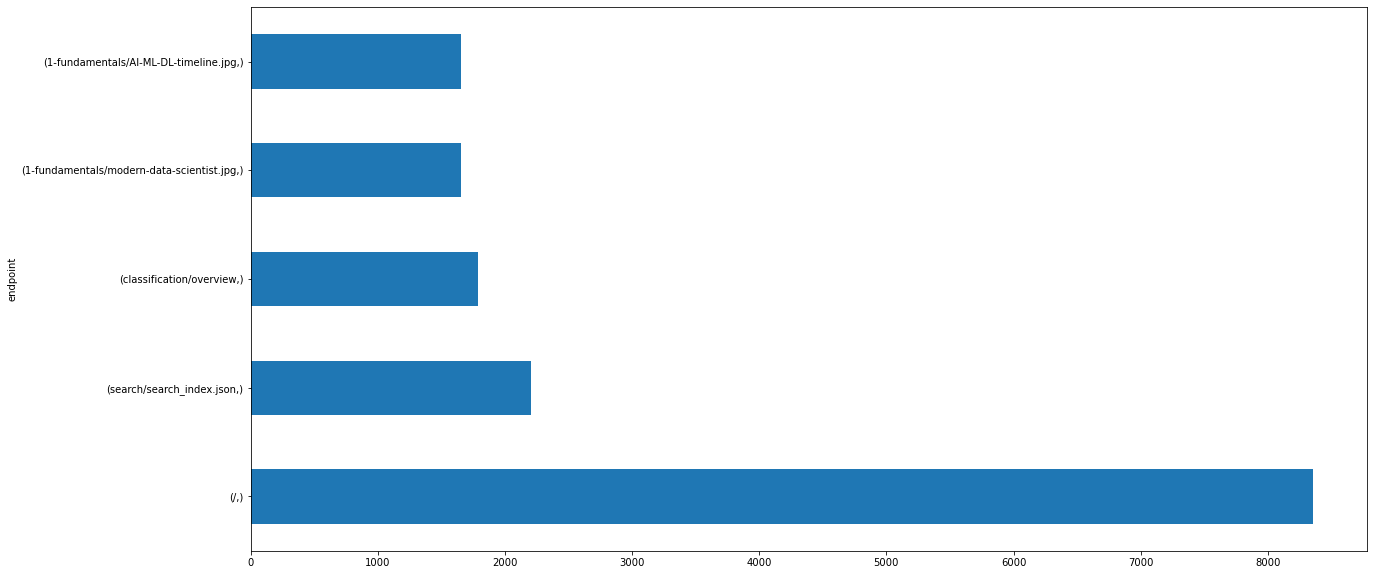

In [19]:
# for DS cohort
plt.figure(figsize=(20,10))
ds_df[['endpoint']].value_counts().head().plot(kind='barh')

# 4
Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

# Identify students who present anomalous activity using the Bollinger Band method. K = 3, span = 30.

In [20]:
span = 30
weight = 3

anomalies = pd.DataFrame()
for u in list(df.user.unique()):
    user_df = fun_4.find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [21]:
anomalies.shape

(2152, 6)

# Thats a lot of anomalies. 
Maybe we can narrow it down further

# Cohort name anomalies

In [22]:
# Find all the users that don't have a cohort name assigned to them
coh_nam_na = df[df.cohort_name.isna()]

In [23]:
# Identify all unique user id's 
coh_nam_na.user.unique();

# Looking for people with both individual user anomalies and no cohort name.

In [24]:
# cross check usernames without a cohort agains usernames that show anomalies
sus_user = np.intersect1d(coh_nam_na.user.unique(),anomalies.user.unique())
sus_user

array([ 48,  54,  58,  59,  61,  63,  64,  73,  78,  79,  86,  88, 103,
       111, 166, 213, 346, 349, 351, 352, 353, 354, 358, 359, 361, 362,
       363, 364, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544, 644,
       663, 713, 714, 716, 717, 718, 720, 721, 728, 729, 736, 744, 815])

# Same process for IP addresses

In [25]:
span = 30
weight = 3

anomalies_ip = pd.DataFrame()
for u in list(df.source_ip.unique()):
    user_df_ip = fun_4.find_anomalies_ip(df, u, span, weight)
    anomalies_ip = pd.concat([anomalies_ip, user_df_ip], axis=0)

In [26]:
anomalies_ip.head()

,pages_one_user,midband,ub,lb,pct_b,source_ip
date,,,,,,
2018-03-14,9,0.627485,7.549265,-6.294295,1.104795,71.137.146.71
2018-05-06,10,0.727782,8.399771,-6.944207,1.104290,71.137.146.71
2018-05-14,72,9.145740,67.060810,-48.769330,1.042642,192.171.117.210
2018-06-30,56,8.695230,53.339983,-35.949523,1.029791,192.171.117.210
2018-07-30,604,51.705165,498.194976,-394.784646,1.118485,192.171.117.210


In [27]:
anomalies_ip.source_ip.nunique()

1371

# Thats a lot of anomalies. Cross reference with users lacking cohort names again.

In [28]:
anomalies_ip.pages_one_user.nunique()

132

In [29]:
# lists the users who were using the ip address when the ip address was displaying suspicious behaviour
sus_ip = np.intersect1d(coh_nam_na.user.unique(),anomalies.pages_one_user.unique())
sus_ip

array([ 48,  54,  58,  59,  61,  62,  63,  64,  73,  74,  78,  79,  86,
        88,  89, 103])

# Combine all three
- No Cohort Name 
AND
- Suspicious Individual User Data
AND
- Suspicious Source_IP Activity reported when User was using that IP adress 

 48,  54,  58,  59,  61,  63,  64,  73,  78,  79,  86,  88, 103

In [30]:
# Suspicious users:
sus = np.intersect1d(sus_user, sus_ip)
sus

array([ 48,  54,  58,  59,  61,  63,  64,  73,  78,  79,  86,  88, 103])

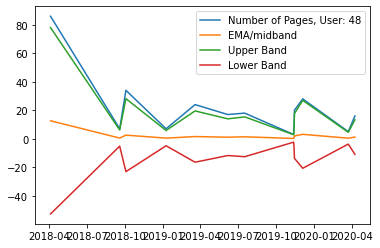

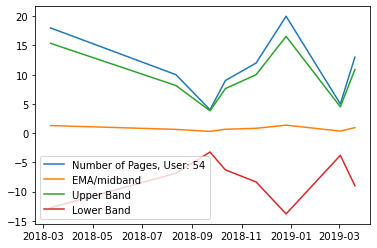

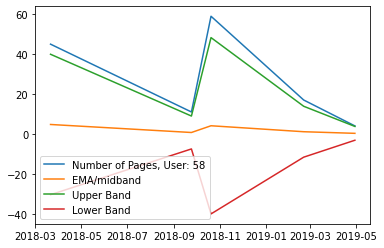

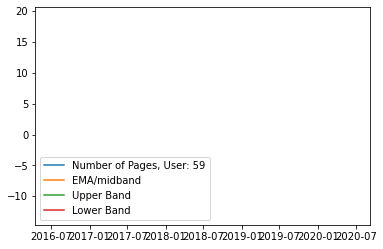

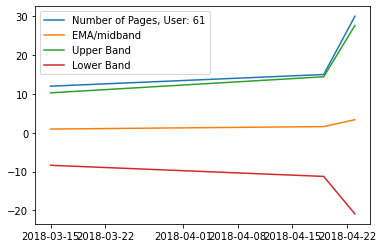

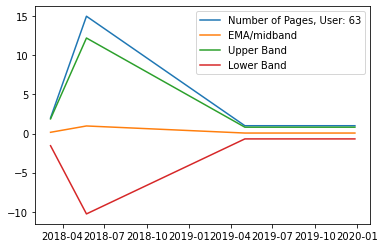

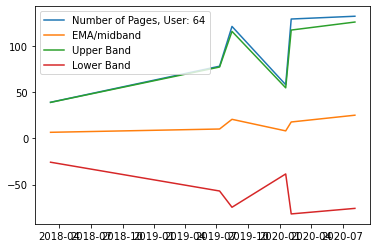

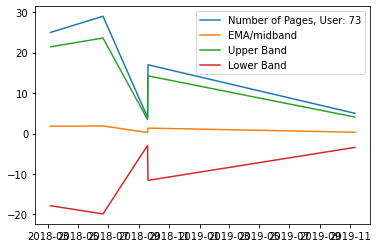

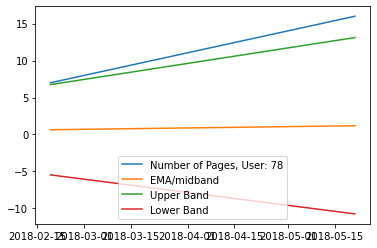

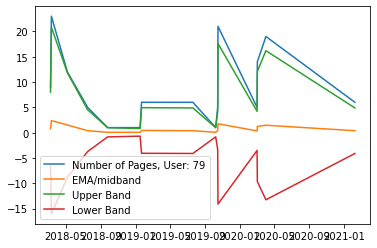

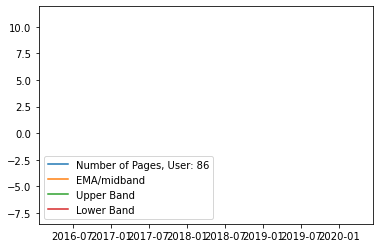

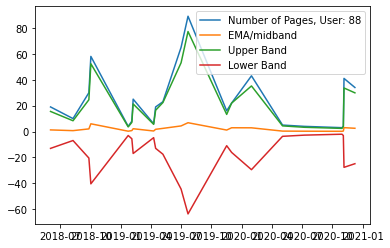

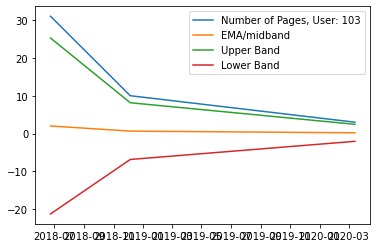

In [31]:
# visual of suspect users
fun_4.plot_bands_two(anomalies, sus)